In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder

# Load data from CSV file
df = pd.read_csv('fd1.csv')

label_encoder = LabelEncoder()
df['size'] = label_encoder.fit_transform(df['size'])

# Split features and labels
X = df.drop(['size'], axis=1).values
y = df['size'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models

In [3]:
# Define neural network architecture
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with softmax activation
])


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/10
23/23 [==============================] - 1s 17ms/step - loss: 3.4745 - accuracy: 0.5587 - val_loss: 1.3701 - val_accuracy: 0.6500
Epoch 2/10
23/23 [==============================] - 0s 6ms/step - loss: 1.2167 - accuracy: 0.7304 - val_loss: 1.2550 - val_accuracy: 0.6500
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 0.9824 - accuracy: 0.7304 - val_loss: 1.0342 - val_accuracy: 0.6500
Epoch 4/10
23/23 [==============================] - 0s 6ms/step - loss: 0.8516 - accuracy: 0.7304 - val_loss: 1.0628 - val_accuracy: 0.6500
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.8353 - accuracy: 0.7304 - val_loss: 0.9519 - val_accuracy: 0.6500
Epoch 6/10
23/23 [==============================] - 0s 5ms/step - loss: 0.8029 - accuracy: 0.7304 - val_loss: 1.0206 - val_accuracy: 0.6500
Epoch 7/10
23/23 [==============================] - 0s 5ms/step - loss: 0.7997 - accuracy: 0.7304 - val_loss: 0.9584 - val_accuracy: 0.6500
Epoch 8/10
23/23 [=

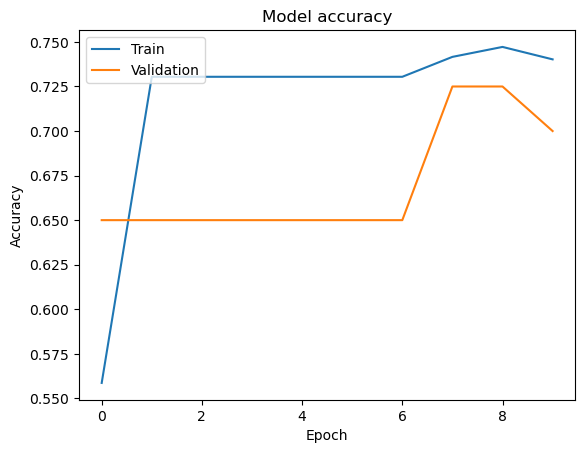

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


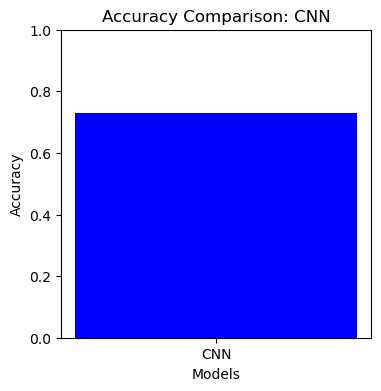

In [10]:
import matplotlib.pyplot as plt

# Sample data
label = ['CNN']
accuracies = [test_acc]

# Adjusting figure size
plt.figure(figsize=(4, 4))  # Change width and height as needed

# Plotting the bar graph
plt.bar(label, accuracies, color=['blue'], width=0.1)  # Adjust width as needed

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: CNN')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1

# Display the plot
plt.show()


In [7]:
from sklearn.metrics import precision_score
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels based on a threshold
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

print("Precision:", precision)


7/7 [==============================] - 0s 2ms/step
Precision: 0.5466604773623739


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
from sklearn.metrics import recall_score

# Assuming X_train, X_test, y_train, and y_test are defined and the model has been trained
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

print("Recall:", recall)

7/7 [==============================] - 0s 4ms/step
Recall: 0.7286432160804021


In [9]:
from sklearn.metrics import f1_score

# Assuming X_train, X_test, y_train, and y_test are defined and the model has been trained
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute F1 score
f1score = f1_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1score)

7/7 [==============================] - 0s 3ms/step
F1 Score: 0.6246153846153847


# RNN

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models


In [12]:
# Reshape data for RNN
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [13]:
# Define RNN architecture (using LSTM)
model = models.Sequential([
    layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc1 = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc1)

Epoch 1/10
23/23 [==============================] - 4s 44ms/step - loss: 1.3909 - accuracy: 0.5349 - val_loss: 1.2916 - val_accuracy: 0.6500
Epoch 2/10
23/23 [==============================] - 0s 6ms/step - loss: 1.0193 - accuracy: 0.7304 - val_loss: 1.1358 - val_accuracy: 0.6500
Epoch 3/10
23/23 [==============================] - 0s 4ms/step - loss: 0.9389 - accuracy: 0.7304 - val_loss: 1.0899 - val_accuracy: 0.6500
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 0.8879 - accuracy: 0.7304 - val_loss: 1.0390 - val_accuracy: 0.6500
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 0.8560 - accuracy: 0.7304 - val_loss: 1.0064 - val_accuracy: 0.6500
Epoch 6/10
23/23 [==============================] - 0s 6ms/step - loss: 0.8155 - accuracy: 0.7318 - val_loss: 0.9882 - val_accuracy: 0.6500
Epoch 7/10
23/23 [==============================] - 0s 5ms/step - loss: 0.7869 - accuracy: 0.7388 - val_loss: 1.0227 - val_accuracy: 0.6500
Epoch 8/10
23/23 [=

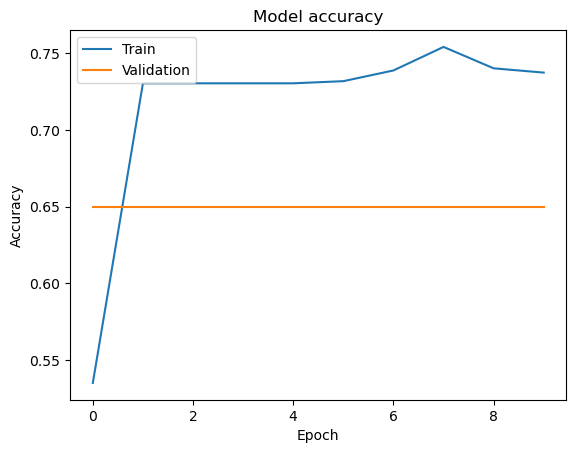

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

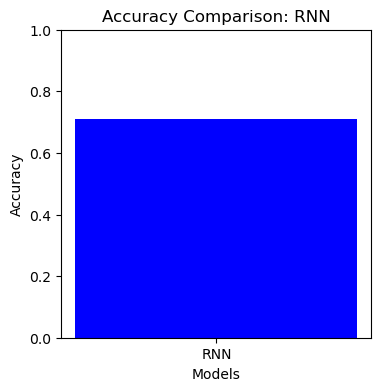

In [20]:
import matplotlib.pyplot as plt

# Sample data
label = ['RNN']
accuracies = [test_acc1]

# Adjusting figure size
plt.figure(figsize=(4, 4))  # Change width and height as needed

# Plotting the bar graph
plt.bar(label, accuracies, color=['blue'], width=0.1)  # Adjust width as needed

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: RNN')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1

# Display the plot
plt.show()


In [17]:
from sklearn.metrics import precision_score
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels based on a threshold
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

print("Precision:", precision)

7/7 [==============================] - 1s 3ms/step
Precision: 0.5363191619473027


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import recall_score

# Assuming X_train, X_test, y_train, and y_test are defined and the model has been trained
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

print("Recall:", recall)

7/7 [==============================] - 0s 3ms/step
Recall: 0.7085427135678392


In [19]:
from sklearn.metrics import f1_score

# Assuming X_train, X_test, y_train, and y_test are defined and the model has been trained
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute F1 score
f1score = f1_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1score)

7/7 [==============================] - 0s 4ms/step
F1 Score: 0.6059306853215422


# GRU

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models


In [25]:
# Reshape features for GRU input (assuming sequential data)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [26]:
# Define GRU architecture
model = models.Sequential([
    layers.GRU(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with softmax activation
])


In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # Include accuracy metric

In [28]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc2 = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc2)

Epoch 1/10
23/23 [==============================] - 4s 42ms/step - loss: 1.0601 - accuracy: 0.7304 - val_loss: 1.1369 - val_accuracy: 0.6500
Epoch 2/10
23/23 [==============================] - 0s 6ms/step - loss: 0.9240 - accuracy: 0.7304 - val_loss: 1.0481 - val_accuracy: 0.6500
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 0.8139 - accuracy: 0.7346 - val_loss: 0.9592 - val_accuracy: 0.6500
Epoch 4/10
23/23 [==============================] - 0s 6ms/step - loss: 0.6994 - accuracy: 0.7458 - val_loss: 0.9322 - val_accuracy: 0.6750
Epoch 5/10
23/23 [==============================] - 0s 7ms/step - loss: 0.6432 - accuracy: 0.7668 - val_loss: 0.7066 - val_accuracy: 0.8000
Epoch 6/10
23/23 [==============================] - 0s 7ms/step - loss: 0.5711 - accuracy: 0.8045 - val_loss: 0.6702 - val_accuracy: 0.7375
Epoch 7/10
23/23 [==============================] - 0s 6ms/step - loss: 0.5240 - accuracy: 0.8101 - val_loss: 0.6792 - val_accuracy: 0.8000
Epoch 8/10
23/23 [=

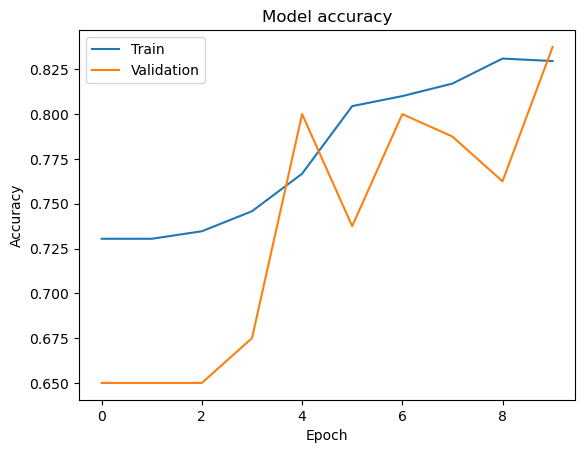

In [29]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

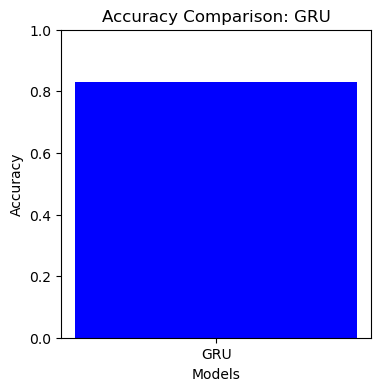

In [32]:
import matplotlib.pyplot as plt

# Sample data
label = ['GRU']
accuracies = [test_acc2]

# Adjusting figure size
plt.figure(figsize=(4, 4))  # Change width and height as needed

# Plotting the bar graph
plt.bar(label, accuracies, color=['blue'], width=0.1)  # Adjust width as needed

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: GRU')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1

# Display the plot
plt.show()

In [34]:
from sklearn.metrics import precision_score
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels based on a threshold
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

print("Precision:", precision)

7/7 [==============================] - 0s 6ms/step
Precision: 0.7537723678775646


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.metrics import recall_score

# Assuming X_train, X_test, y_train, and y_test are defined and the model has been trained
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

print("Recall:", recall)

7/7 [==============================] - 1s 4ms/step
Recall: 0.8291457286432161


In [31]:
from sklearn.metrics import f1_score

# Assuming X_train, X_test, y_train, and y_test are defined and the model has been trained
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute F1 score
f1score = f1_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1score)

7/7 [==============================] - 0s 4ms/step
F1 Score: 0.7879938485531104


# COMPARISION PLOTS

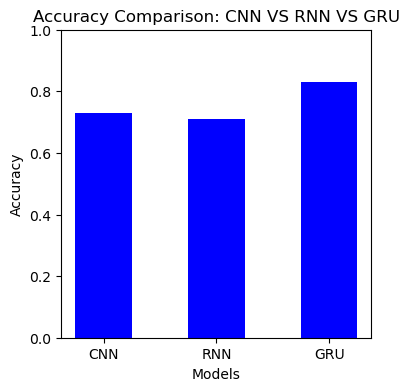

In [33]:
import matplotlib.pyplot as plt

# Sample data
label = ['CNN','RNN','GRU']
accuracies = [test_acc,test_acc1,test_acc2]

# Adjusting figure size
plt.figure(figsize=(4, 4))  # Change width and height as needed

# Plotting the bar graph
plt.bar(label, accuracies, color=['blue'], width=0.5)  # Adjust width as needed

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: CNN VS RNN VS GRU')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1

# Display the plot
plt.show()